In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

In [ ]:
wieght =0.3
bias=0.7
start=0
end=5 # Increased end value
step=0.01 # Decreased step value
x=torch.arange(start,end,step).unsqueeze(dim=1)
y=x*wieght+bias

x[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.7000],
         [0.7030],
         [0.7060],
         [0.7090],
         [0.7120],
         [0.7150],
         [0.7180],
         [0.7210],
         [0.7240],
         [0.7270]]))

In [ ]:
len(x),len(y)

(500, 500)

In [ ]:
train_split=int(0.8*len(x))
x_train,y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]


len(x_train),len(y_train),len(x_test),len(y_test)

(400, 400, 100, 100)

In [ ]:
x_train[:10],y_train[:10],x_test[:10],y_test[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.7000],
         [0.7030],
         [0.7060],
         [0.7090],
         [0.7120],
         [0.7150],
         [0.7180],
         [0.7210],
         [0.7240],
         [0.7270]]),
 tensor([[4.0000],
         [4.0100],
         [4.0200],
         [4.0300],
         [4.0400],
         [4.0500],
         [4.0600],
         [4.0700],
         [4.0800],
         [4.0900]]),
 tensor([[1.9000],
         [1.9030],
         [1.9060],
         [1.9090],
         [1.9120],
         [1.9150],
         [1.9180],
         [1.9210],
         [1.9240],
         [1.9270]]))

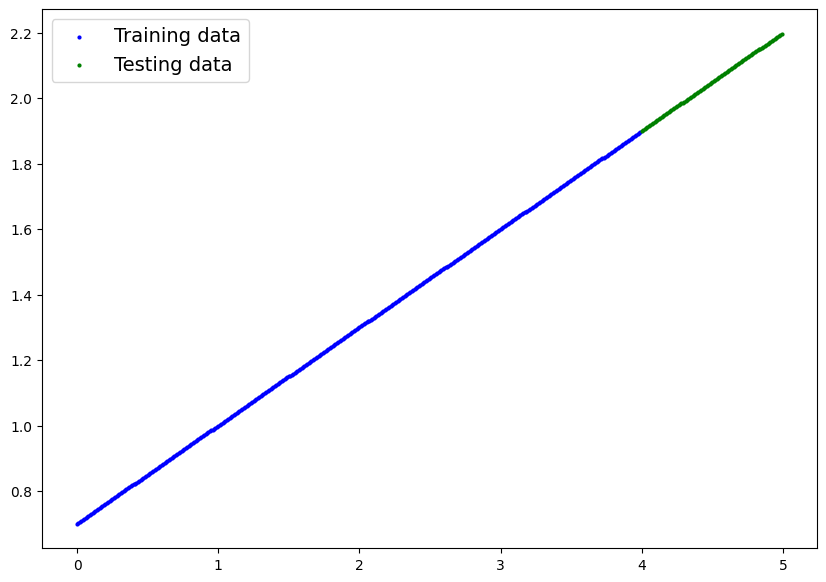

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):

  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

plot_predictions();

In [ ]:
from torch import nn

class LinearRegressionModel(nn.Module): # Corrected class name
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=torch.float))

  def forward(self, x: torch.Tensor): # Corrected indentation
        return self.weights*x+self.bias

In [ ]:
model_0=LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.4740], requires_grad=True),
 Parameter containing:
 tensor([0.1978], requires_grad=True)]

In [ ]:
x_test

tensor([[4.0000],
        [4.0100],
        [4.0200],
        [4.0300],
        [4.0400],
        [4.0500],
        [4.0600],
        [4.0700],
        [4.0800],
        [4.0900],
        [4.1000],
        [4.1100],
        [4.1200],
        [4.1300],
        [4.1400],
        [4.1500],
        [4.1600],
        [4.1700],
        [4.1800],
        [4.1900],
        [4.2000],
        [4.2100],
        [4.2200],
        [4.2300],
        [4.2400],
        [4.2500],
        [4.2600],
        [4.2700],
        [4.2800],
        [4.2900],
        [4.3000],
        [4.3100],
        [4.3200],
        [4.3300],
        [4.3400],
        [4.3500],
        [4.3600],
        [4.3700],
        [4.3800],
        [4.3900],
        [4.4000],
        [4.4100],
        [4.4200],
        [4.4300],
        [4.4400],
        [4.4500],
        [4.4600],
        [4.4700],
        [4.4800],
        [4.4900],
        [4.5000],
        [4.5100],
        [4.5200],
        [4.5300],
        [4.5400],
        [4

In [ ]:
y_test

tensor([[1.9000],
        [1.9030],
        [1.9060],
        [1.9090],
        [1.9120],
        [1.9150],
        [1.9180],
        [1.9210],
        [1.9240],
        [1.9270],
        [1.9300],
        [1.9330],
        [1.9360],
        [1.9390],
        [1.9420],
        [1.9450],
        [1.9480],
        [1.9510],
        [1.9540],
        [1.9570],
        [1.9600],
        [1.9630],
        [1.9660],
        [1.9690],
        [1.9720],
        [1.9750],
        [1.9780],
        [1.9810],
        [1.9840],
        [1.9870],
        [1.9900],
        [1.9930],
        [1.9960],
        [1.9990],
        [2.0020],
        [2.0050],
        [2.0080],
        [2.0110],
        [2.0140],
        [2.0170],
        [2.0200],
        [2.0230],
        [2.0260],
        [2.0290],
        [2.0320],
        [2.0350],
        [2.0380],
        [2.0410],
        [2.0440],
        [2.0470],
        [2.0500],
        [2.0530],
        [2.0560],
        [2.0590],
        [2.0620],
        [2

In [ ]:
with torch.inference_mode():
  y_preds=model_0(x_test)

y_preds

tensor([[2.0939],
        [2.0987],
        [2.1034],
        [2.1082],
        [2.1129],
        [2.1176],
        [2.1224],
        [2.1271],
        [2.1319],
        [2.1366],
        [2.1414],
        [2.1461],
        [2.1508],
        [2.1556],
        [2.1603],
        [2.1651],
        [2.1698],
        [2.1745],
        [2.1793],
        [2.1840],
        [2.1888],
        [2.1935],
        [2.1982],
        [2.2030],
        [2.2077],
        [2.2125],
        [2.2172],
        [2.2219],
        [2.2267],
        [2.2314],
        [2.2362],
        [2.2409],
        [2.2456],
        [2.2504],
        [2.2551],
        [2.2599],
        [2.2646],
        [2.2693],
        [2.2741],
        [2.2788],
        [2.2836],
        [2.2883],
        [2.2930],
        [2.2978],
        [2.3025],
        [2.3073],
        [2.3120],
        [2.3167],
        [2.3215],
        [2.3262],
        [2.3310],
        [2.3357],
        [2.3404],
        [2.3452],
        [2.3499],
        [2

In [ ]:
with torch.no_grad():
  y_preds=model_0(x_test)

y_preds

tensor([[2.0939],
        [2.0987],
        [2.1034],
        [2.1082],
        [2.1129],
        [2.1176],
        [2.1224],
        [2.1271],
        [2.1319],
        [2.1366],
        [2.1414],
        [2.1461],
        [2.1508],
        [2.1556],
        [2.1603],
        [2.1651],
        [2.1698],
        [2.1745],
        [2.1793],
        [2.1840],
        [2.1888],
        [2.1935],
        [2.1982],
        [2.2030],
        [2.2077],
        [2.2125],
        [2.2172],
        [2.2219],
        [2.2267],
        [2.2314],
        [2.2362],
        [2.2409],
        [2.2456],
        [2.2504],
        [2.2551],
        [2.2599],
        [2.2646],
        [2.2693],
        [2.2741],
        [2.2788],
        [2.2836],
        [2.2883],
        [2.2930],
        [2.2978],
        [2.3025],
        [2.3073],
        [2.3120],
        [2.3167],
        [2.3215],
        [2.3262],
        [2.3310],
        [2.3357],
        [2.3404],
        [2.3452],
        [2.3499],
        [2

In [ ]:
loss_fn=nn.MSELoss() # Changed to MSELoss
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1) # Increased learning rate

In [ ]:
torch.manual_seed(42)
epochs=200

epoch_count=[]
loss_values=[]
test_loss_values=[]

for epoch in range(epochs):
  model_0.train()
  y_pred=model_0(x_train)
  loss=loss_fn(y_pred,y_train)
  print(f"Lose:{loss}")
  optimizer.zero_grad()
  loss.backward()
  total_norm = 0.0
  for name, p in model_0.named_parameters(): # Corrected model name
        if p.grad is not None:
            param_norm = p.grad.detach().data.norm(2).item()
            total_norm += param_norm ** 2
            print(f"{name} grad norm: {param_norm:.4e}")
  total_norm = total_norm**0.5
  print(f" Total grad norm: {total_norm:.4e}")
  optimizer.step()




  model_0.eval()
  print(model_0.state_dict())

  with torch.inference_mode():
    test_pred=model_0(x_test)
    test_loss=loss_fn(test_pred,y_test)

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss.detach().item())
      test_loss_values.append(test_loss.detach().item())
      print(f"epoch:{epoch} | Loss: {loss} |Test Loss: {test_loss}")

      print(model_0.state_dict())

Lose:0.06441240012645721
weights grad norm: 1.5436e-01
bias grad norm: 3.1001e-01
 Total grad norm: 3.4631e-01
OrderedDict([('weights', tensor([0.4895])), ('bias', tensor([0.2288]))])
epoch:0 | Loss: 0.06441240012645721 |Test Loss: 0.1477580964565277
OrderedDict([('weights', tensor([0.4895])), ('bias', tensor([0.2288]))])
Lose:0.056555647403001785
weights grad norm: 1.3337e-01
bias grad norm: 1.8642e-01
 Total grad norm: 2.2921e-01
OrderedDict([('weights', tensor([0.4761])), ('bias', tensor([0.2474]))])
Lose:0.05160249397158623
weights grad norm: 6.6022e-02
bias grad norm: 2.0235e-01
 Total grad norm: 2.1284e-01
OrderedDict([('weights', tensor([0.4695])), ('bias', tensor([0.2677]))])
Lose:0.04718022048473358
weights grad norm: 7.6599e-02
bias grad norm: 1.8822e-01
 Total grad norm: 2.0321e-01
OrderedDict([('weights', tensor([0.4619])), ('bias', tensor([0.2865]))])
Lose:0.04314159229397774
weights grad norm: 7.0299e-02
bias grad norm: 1.8114e-01
 Total grad norm: 1.9430e-01
OrderedDict(

In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()),test_loss_values

(array([6.4412400e-02, 2.5219068e-02, 1.0306648e-02, 4.2121690e-03,
        1.7214513e-03, 7.0352765e-04, 2.8752087e-04, 1.1750551e-04,
        4.8022157e-05, 1.9626195e-05, 8.0210248e-06, 3.2779799e-06,
        1.3395855e-06, 5.4747511e-07, 2.2375616e-07, 9.1462290e-08,
        3.7384581e-08, 1.5276134e-08, 6.2428223e-09, 2.5508402e-09],
       dtype=float32),
 [0.1477580964565277,
  0.05398593470454216,
  0.02206321991980076,
  0.009016904979944229,
  0.00368508487008512,
  0.0015060236910358071,
  0.0006154921720735729,
  0.0002515436499379575,
  0.00010279966227244586,
  4.201236515655182e-05,
  1.717117993393913e-05,
  7.017234565864783e-06,
  2.8675303838099353e-06,
  1.171894155049813e-06,
  4.789233116753167e-07,
  1.9580792809392733e-07,
  8.00734056838337e-08,
  3.272678483767777e-08,
  1.3344479299348677e-08,
  5.453981710701328e-09])

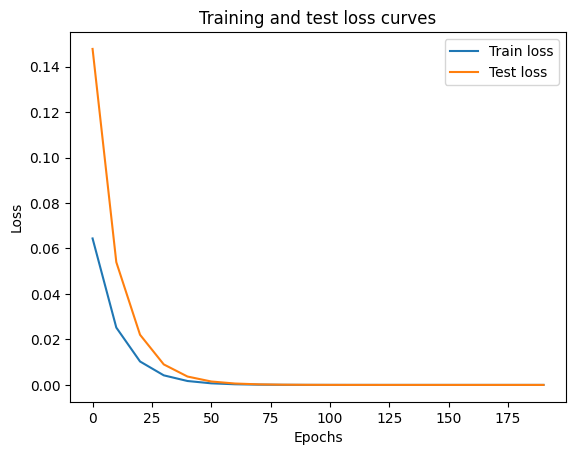

In [ ]:
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
with torch.inference_mode():
  y_preds_new=model_0(x_test)

y_preds

tensor([[2.0939],
        [2.0987],
        [2.1034],
        [2.1082],
        [2.1129],
        [2.1176],
        [2.1224],
        [2.1271],
        [2.1319],
        [2.1366],
        [2.1414],
        [2.1461],
        [2.1508],
        [2.1556],
        [2.1603],
        [2.1651],
        [2.1698],
        [2.1745],
        [2.1793],
        [2.1840],
        [2.1888],
        [2.1935],
        [2.1982],
        [2.2030],
        [2.2077],
        [2.2125],
        [2.2172],
        [2.2219],
        [2.2267],
        [2.2314],
        [2.2362],
        [2.2409],
        [2.2456],
        [2.2504],
        [2.2551],
        [2.2599],
        [2.2646],
        [2.2693],
        [2.2741],
        [2.2788],
        [2.2836],
        [2.2883],
        [2.2930],
        [2.2978],
        [2.3025],
        [2.3073],
        [2.3120],
        [2.3167],
        [2.3215],
        [2.3262],
        [2.3310],
        [2.3357],
        [2.3404],
        [2.3452],
        [2.3499],
        [2

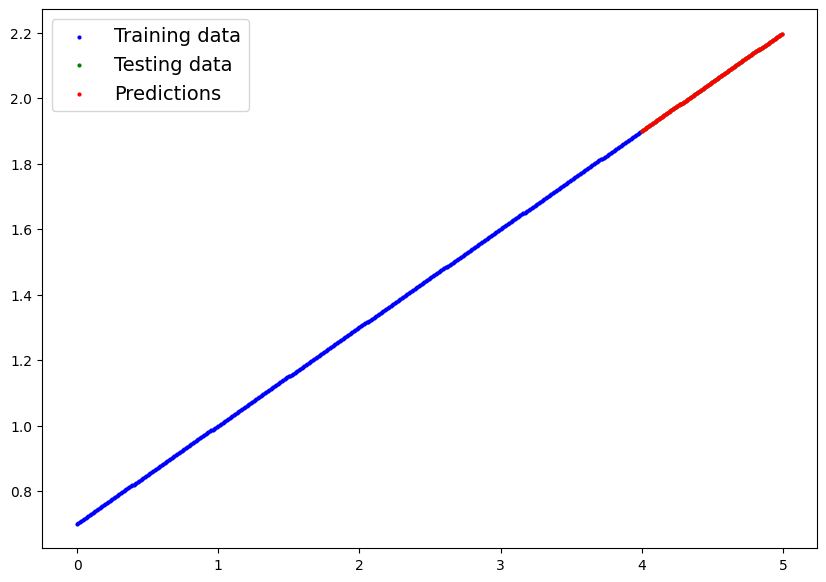

In [ ]:
plot_predictions(predictions=y_preds_new)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3000])), ('bias', tensor([0.6999]))])

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3000])), ('bias', tensor([0.6999]))])

In [ ]:
wieght, bias

(0.3, 0.7)

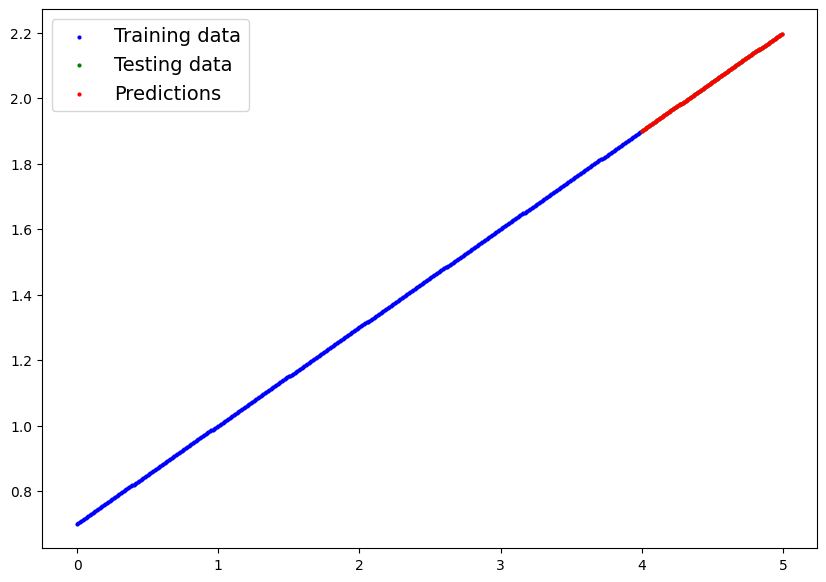

In [ ]:
plot_predictions(predictions=y_preds_new)

In [ ]:
from pathlib import Path

MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)
MODEL_NAME="01_pytorch_linear_regression_model_0.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
print(MODEL_SAVE_PATH)
print(F"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)




models/01_pytorch_linear_regression_model_0.pth
Saving model to:models/01_pytorch_linear_regression_model_0.pth


In [ ]:
! ls -1 models

01_pytorch_linear_regression_model_0.pth
02_pytorch_linear_regression_model_v2.pth


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3000])), ('bias', tensor([0.6999]))])

In [ ]:
loaded_model_0=LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3000])), ('bias', tensor([0.6999]))])

In [ ]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(x_test)

loaded_model_preds

tensor([[1.9000],
        [1.9030],
        [1.9060],
        [1.9090],
        [1.9120],
        [1.9150],
        [1.9180],
        [1.9210],
        [1.9240],
        [1.9270],
        [1.9300],
        [1.9330],
        [1.9360],
        [1.9390],
        [1.9420],
        [1.9450],
        [1.9480],
        [1.9510],
        [1.9540],
        [1.9570],
        [1.9600],
        [1.9630],
        [1.9660],
        [1.9690],
        [1.9720],
        [1.9750],
        [1.9780],
        [1.9810],
        [1.9840],
        [1.9870],
        [1.9900],
        [1.9930],
        [1.9960],
        [1.9990],
        [2.0020],
        [2.0050],
        [2.0080],
        [2.0110],
        [2.0140],
        [2.0170],
        [2.0200],
        [2.0230],
        [2.0260],
        [2.0290],
        [2.0320],
        [2.0350],
        [2.0380],
        [2.0410],
        [2.0440],
        [2.0470],
        [2.0500],
        [2.0530],
        [2.0560],
        [2.0590],
        [2.0620],
        [2

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(x_test)

y_preds

tensor([[1.9000],
        [1.9030],
        [1.9060],
        [1.9090],
        [1.9120],
        [1.9150],
        [1.9180],
        [1.9210],
        [1.9240],
        [1.9270],
        [1.9300],
        [1.9330],
        [1.9360],
        [1.9390],
        [1.9420],
        [1.9450],
        [1.9480],
        [1.9510],
        [1.9540],
        [1.9570],
        [1.9600],
        [1.9630],
        [1.9660],
        [1.9690],
        [1.9720],
        [1.9750],
        [1.9780],
        [1.9810],
        [1.9840],
        [1.9870],
        [1.9900],
        [1.9930],
        [1.9960],
        [1.9990],
        [2.0020],
        [2.0050],
        [2.0080],
        [2.0110],
        [2.0140],
        [2.0170],
        [2.0200],
        [2.0230],
        [2.0260],
        [2.0290],
        [2.0320],
        [2.0350],
        [2.0380],
        [2.0410],
        [2.0440],
        [2.0470],
        [2.0500],
        [2.0530],
        [2.0560],
        [2.0590],
        [2.0620],
        [2

In [ ]:
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__


'2.6.0+cu124'

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"using device:{device}")

using device:cpu


In [ ]:
wieght=0.7
bias=0.3


start=0
end=1
step=0.02

x=torch.arange(start,end,step).unsqueeze(dim=1)
y=x*wieght+bias

x[:10],y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
train_split=int(0.8*len(x))
x_train,y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]

len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

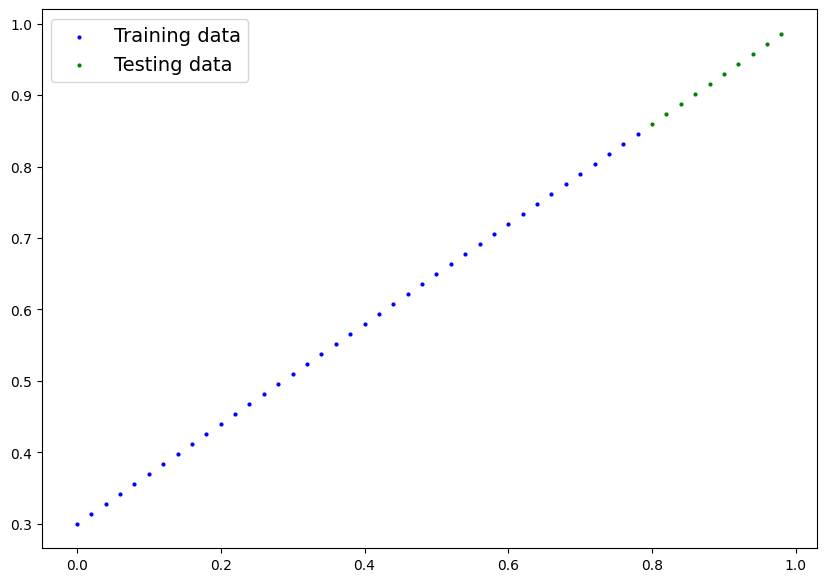

In [ ]:
plot_predictions(x_train,y_train,x_test,y_test)

In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer=nn.Linear(in_features=1,
                                 out_features=1)

  def forward(self,x:torch.Tensor):
    return self.linear_layer(x)

torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.01)


In [ ]:
torch.manual_seed(42)
epochs=300
for epoch in range(epochs):
  model_1.train()

  y_pred=model_1(x_train)
  loss=loss_fn(y_pred,y_train)
  optimizer.zero_grad()

  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred=model_1(x_test)
    test_loss=loss_fn(test_pred,y_test)

    if epoch%10==0:
      print(f"Epoch:{epoch} | Loss:{loss},Test Loss:{test_loss}")



Epoch:0 | Loss:0.5551779866218567,Test Loss:0.5739762187004089
Epoch:10 | Loss:0.4399680495262146,Test Loss:0.4392663538455963
Epoch:20 | Loss:0.3247582018375397,Test Loss:0.30455657839775085
Epoch:30 | Loss:0.20954827964305878,Test Loss:0.16984674334526062
Epoch:40 | Loss:0.09433844685554504,Test Loss:0.03513689711689949
Epoch:50 | Loss:0.023886386305093765,Test Loss:0.04784906655550003
Epoch:60 | Loss:0.0199567973613739,Test Loss:0.04580312222242355
Epoch:70 | Loss:0.016517987474799156,Test Loss:0.0375305712223053
Epoch:80 | Loss:0.013089170679450035,Test Loss:0.029944902285933495
Epoch:90 | Loss:0.009653178043663502,Test Loss:0.02167237363755703
Epoch:100 | Loss:0.006215679459273815,Test Loss:0.014086711220443249
Epoch:110 | Loss:0.002787243574857712,Test Loss:0.005814164876937866
Epoch:120 | Loss:0.0012645035749301314,Test Loss:0.013801807537674904
Epoch:130 | Loss:0.0012645035749301314,Test Loss:0.013801807537674904
Epoch:140 | Loss:0.0012645035749301314,Test Loss:0.01380180753767

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
wieght, bias

(0.7, 0.3)

In [ ]:
model_1.eval()

with torch.inference_mode():
  y_preds=model_1(x_test)

y_preds




tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

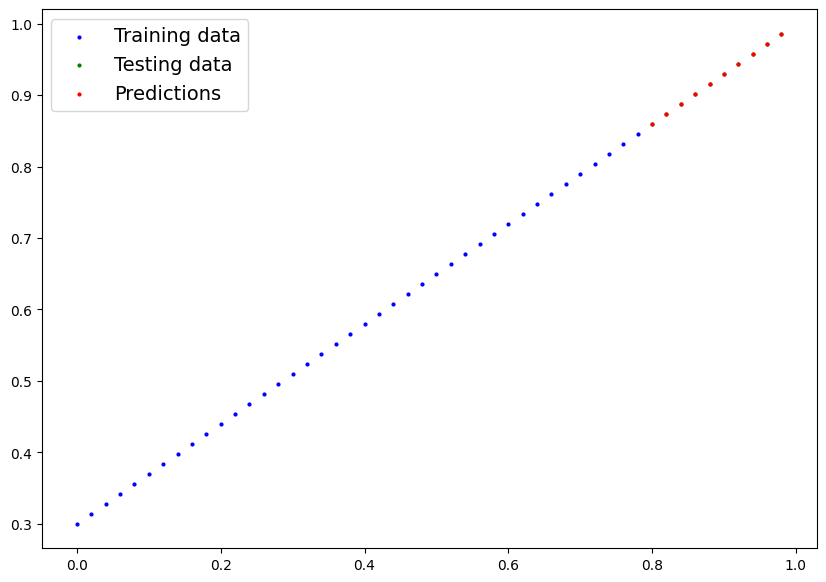

In [ ]:
plot_predictions(x_train,y_train,x_test,y_test,y_preds)

In [ ]:
from pathlib import Path

MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME="02_pytorch_linear_regression_model_v2.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

print(f"Saving model to:{MODEL_SAVE_PATH}")

torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to:models/02_pytorch_linear_regression_model_v2.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
loaded_model_1=LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds=loaded_model_1(x_test)


y_preds==loaded_model_1_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])